In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [21]:
# LOAD ACTIVITY-ANNOTATED CHEMICAL LIBRARY
full_df = pd.read_csv('/Users/marenaisabelle/CODE/GADSI/fulldf')

In [22]:
full_df.head()

,PC_CID,Activity,Smiles
0,646155.0,0.0,C1CN(CCN1CCCCN2C(=O)C3=CC=CC=C3C2=O)C(=O)C4=C...
1,2123.0,0.0,CN(C)C1=NC(=NC(=N1)N(C)C)N(C)C
2,66644.0,0.0,C1=CC=C(C(=C1)C(=O)NO)O
3,5803.0,0.0,C1=CC(=C(C=C1OC2=C(C=C(C=C2I)CC(=O)O)I)I)O
4,5803.0,0.0,C1=CC(=C(C=C1OC2=C(C=C(C=C2I)CC(=O)O)I)I)O


0.0    10225
1.0      241
Name: Activity, dtype: int64


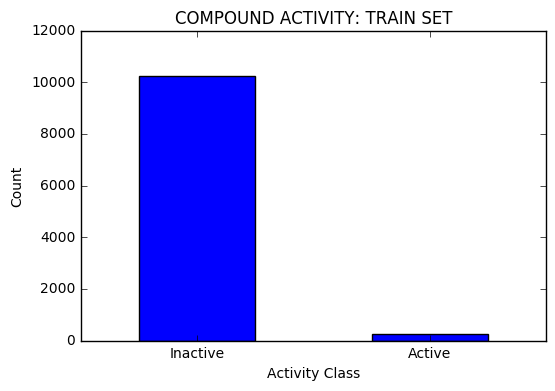

In [19]:
# ACTIVE COMPOUND STATISTICS
print full_df.Activity.value_counts()

fig = full_df.Activity.value_counts().plot(kind='bar')
group_labels = ['Inactive', 'Active']
fig.set_title('COMPOUND ACTIVITY: TRAIN SET')
fig.set_xlabel('Activity Class')
fig.set_xticklabels(group_labels, rotation ='horizontal')
fig.set_ylabel('Count')

In [10]:
# EXTRACT SMILES FROM DF
smiles = full_df.Smiles

In [ ]:
# GENERATE MOLECULAR FINGERPRINTS:

mols, np_fps , bit_fps= [], [], []

for m in full_df.Smiles.values:
    mol = Chem.MolFromSmiles(m)
    mols.append(mol)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol,2)
    bit_fps.append(fp)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

In [ ]:
# CALCULATE TANIMOTO SIMILARITY SCORES
similarity_scores = DataStructs.BulkTanimotoSimilarity(bit_fps[1], bit_fps[1:])

In [206]:
# CREATE FINGERPRINT-CLUSTER FUNCTION

def ClusterFps(fps,cutoff=0.2):
    from rdkit.DataStructs import BulkTanimotoSimilarity
    from rdkit.ML.Cluster import Butina

    # first generate the distance matrix:
    dists = []
    nfps = len(fps)
    for i in range(0,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i], fps[:i])
        dists.extend([1-x for x in sims])

    # now cluster the data:
    cs = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)
    return cs

In [267]:
# CALCULATE CLUSTERS AND CLUSTER MEMBERSHIP
clust = ClusterFps(bit_fps, cutoff=.91) # accepts bitvec data only
cluster = [x for x in clust if len(x)>3]

In [271]:
len(cluster)

7